In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx 

## Preliminary Part

In [80]:
dataset = pd.read_excel('C:\\Users\\T450s\\Documents\\Domenico\\Data Science\\Materie\\A Scelta\\Social Research\\Project\\Partecipate_1.xlsx')

In [81]:
dataset

,N,Amministrazione Settore Istituzionale,Amministrazione Macrocategoria,Amministrazione Categoria,Amministrazione Denominazione,Amministrazione Codice Fiscale,Appartenenza perimetro Revisione Ordinaria,Amministrazione Regione Sede,Amministrazione Provincia Sede,Amministrazione Comune Sede,...,Attività a favore Amm.,Società all. A,Attività svolta,Quota soggetto privato,"Attività analoghe (art.20, c.2 lett.c)","Contenimento dei costi (art.20, c.2 lett.f)","Aggregazione di società (art.20, c.2 lett.g)",Esito della ricognizione,Modalità Razionalizzazione,Termine Razionalizzazione
0,137,S13,Amministrazioni Locali,Comuni,COMUNE DI AFFI (VR),[00683030233],SI,VENETO,VERONA,AFFI,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
1,630,S13,Amministrazioni Locali,Comuni,COMUNE DI AFFI (VR),[00683030233],SI,VENETO,VERONA,AFFI,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
2,686,S13,Amministrazioni Locali,Comuni,COMUNE DI AFFI (VR),[00683030233],SI,VENETO,VERONA,AFFI,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
3,20,S13,Amministrazioni Locali,Comuni,COMUNE DI ALBAREDO D'ADIGE (VR),[00264700238],SI,VENETO,VERONA,ALBAREDO D'ADIGE,...,NO,NO,nessuna attività,NaN,NO,NO,NO,RAZIONALIZZAZIONE,Liquidazione della società,44561.0
4,413,S13,Amministrazioni Locali,Comuni,COMUNE DI ALBAREDO D'ADIGE (VR),[00264700238],SI,VENETO,VERONA,ALBAREDO D'ADIGE,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,93,S13,Amministrazioni Locali,Comuni,COMUNE DI ZIMELLA (VR),[00631830239],SI,VENETO,VERONA,ZIMELLA,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,230,S13,Amministrazioni Locali,Comuni,COMUNE DI ZIMELLA (VR),[00631830239],SI,VENETO,VERONA,ZIMELLA,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
575,336,S13,Amministrazioni Locali,Comuni,COMUNE DI ZIMELLA (VR),[00631830239],SI,VENETO,VERONA,ZIMELLA,...,SI,NO,produzione di un servizio di interesse general...,NaN,NO,NO,NO,MANTENIMENTO,NaN,NaN
576,375,S13,Amministrazioni Locali,Comuni,COMUNE DI ZIMELLA (VR),[00631830239],SI,VENETO,VERONA,ZIMELLA,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
Comuni = list(np.unique(dataset['Amministrazione Denominazione'].values))
Comuni_2 = list(np.unique(dataset['Amministrazione Comune Sede'].values))
j = 0
for i in range(len(Comuni)):
  if any(dataset[dataset['Amministrazione Denominazione'] == Comuni[i]]['Amministrazione Comune Sede'] != Comuni_2[i]):
    print(False)
  else:
    j = j+1
print(j)

94


In [83]:
dataset = dataset.drop(columns=['Amministrazione Settore Istituzionale', 'Amministrazione Macrocategoria', 'Amministrazione Categoria', 'Amministrazione Regione Sede', 'Amministrazione Provincia Sede', 'Quota soggetto privato'])

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 87 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   N                                                                       578 non-null    int64  
 1   Amministrazione Denominazione                                           578 non-null    object 
 2   Amministrazione Codice Fiscale                                          578 non-null    object 
 3   Appartenenza perimetro Revisione Ordinaria                              578 non-null    object 
 4   Amministrazione Comune Sede                                             578 non-null    object 
 5   Partecipata Denominazione                                               578 non-null    object 
 6   Partecipata Codice Fiscale                                              578 non-nu

In [85]:
dataset = dataset.drop(columns=[dataset.columns[3], dataset.columns[10], dataset.columns[15], dataset.columns[16], dataset.columns[17], dataset.columns[18], 
dataset.columns[80], dataset.columns[81], dataset.columns[82], dataset.columns[83], dataset.columns[84], dataset.columns[85], dataset.columns[86], 'Totale oneri - Importo impegnato', 'Totale oneri - Importo pagato c/residui', 'Totale oneri - Importo pagato c/competenza', 'Partecipata Bilancio di esercizio approvato'])

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 70 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   N                                                                       578 non-null    int64  
 1   Amministrazione Denominazione                                           578 non-null    object 
 2   Amministrazione Codice Fiscale                                          578 non-null    object 
 3   Amministrazione Comune Sede                                             578 non-null    object 
 4   Partecipata Denominazione                                               578 non-null    object 
 5   Partecipata Codice Fiscale                                              578 non-null    object 
 6   Partecipata Anno di costituzione                                        578 non-nu

In [87]:
dataset_1 = dataset[['Amministrazione Denominazione', 'Partecipata Denominazione']]

In [88]:
dataset_1

,Amministrazione Denominazione,Partecipata Denominazione
0,COMUNE DI AFFI (VR),DEPURAZIONI BENACENSI S.C. R. L.
1,COMUNE DI AFFI (VR),VIVERACQUA S.C. A R.L.
2,COMUNE DI AFFI (VR),AZIENDA GARDESANA SERVIZI S.P.A. IN BREVE A.G....
3,COMUNE DI ALBAREDO D'ADIGE (VR),CISIAG S.P.A.
4,COMUNE DI ALBAREDO D'ADIGE (VR),S.I.VE. SERVIZI INTERCOMUNALI VERONAPIANURA S....
...,...,...
573,COMUNE DI ZIMELLA (VR),CONSIGLIO DI BACINO 'VERONESE'
574,COMUNE DI ZIMELLA (VR),UNISERVIZI S.P.A.
575,COMUNE DI ZIMELLA (VR),UNI.CO.G.E. SRL
576,COMUNE DI ZIMELLA (VR),CONSORZIO CEV


In [156]:
nodes = set(dataset_1['Amministrazione Denominazione'])
edges = []
for node in nodes:
  PD_current = [dataset_1["Partecipata Denominazione"][dataset_1['Amministrazione Denominazione']==node]][0]
  #for soc in PD_current:
  for i in range(len(dataset_1)):
    if dataset_1["Partecipata Denominazione"][i] in PD_current.values and dataset_1['Amministrazione Denominazione'][i] != node:
      edges = edges + [(dataset_1["Amministrazione Denominazione"][i], node)]

edges = set(edges)

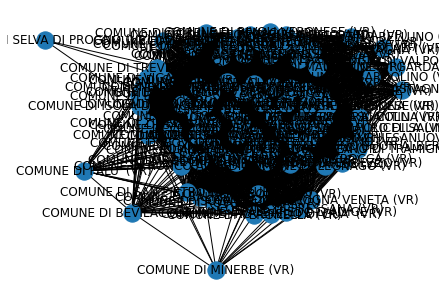

In [157]:
dom_graph = nx.Graph()


dom_graph.add_nodes_from(nodes)
dom_graph.add_edges_from(edges)
nx.draw_kamada_kawai(dom_graph, with_labels = True)

## First Analysis

In [91]:
print(nx.density(dom_graph))

0.8226950354609929


The Betweenness Centrality is the centrality of control.

It represents the frequency at which a point occurs on the shortest paths that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.

In [92]:
betweenness = nx.betweenness_centrality(dom_graph)
betweenness

{'COMUNE DI LAZISE (VR)': 0.0010745883350551269,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.001293657611439452,
 'COMUNE DI CERRO VERONESE (VR)': 0.0015111654775493766,
 'COMUNE DI SALIZZOLE (VR)': 0.0010313711158378431,
 'COMUNE DI ZIMELLA (VR)': 0.0024232364328156657,
 'COMUNE DI GARDA (VR)': 2.68599755796657e-05,
 'COMUNE DI ROVERCHIARA (VR)': 0.0010313711158378431,
 'COMUNE DI ARCOLE (VR)': 0.0029709239019617634,
 'COMUNE DI BARDOLINO (VR)': 0.0002540783242822545,
 "COMUNE DI RONCO ALL'ADIGE (VR)": 0.0019408208202445437,
 'COMUNE DI AFFI (VR)': 2.68599755796657e-05,
 'COMUNE DI ISOLA DELLA SCALA (VR)': 0.0012776604830737261,
 "COMUNE DI MONTEFORTE D'ALPONE (VR)": 0.002272720721182967,
 'COMUNE DI CAVAION VERONESE (VR)': 0.00098018382549319,
 'COMUNE DI VELO VERONESE (VR)': 0.0015111654775493766,
 'COMUNE DI BADIA CALAVENA (VR)': 0.009711944657601843,
 'COMUNE DI ZEVIO (VR)': 0.0004280276370037938,
 'COMUNE DI CONCAMARISE (VR)': 0.0031054502633412976,
 'COMUNE DI SANGUINETTO (VR)': 0.

In [93]:
a = max(betweenness.values())
b = min(betweenness.values())
print(betweenness.values())
[a, b]

dict_values([0.0010745883350551269, 0.001293657611439452, 0.0015111654775493766, 0.0010313711158378431, 0.0024232364328156657, 2.68599755796657e-05, 0.0010313711158378431, 0.0029709239019617634, 0.0002540783242822545, 0.0019408208202445437, 2.68599755796657e-05, 0.0012776604830737261, 0.002272720721182967, 0.00098018382549319, 0.0015111654775493766, 0.009711944657601843, 0.0004280276370037938, 0.0031054502633412976, 0.005462447913803686, 0.0006836002323763338, 0.0010745883350551269, 0.001656321045671664, 0.0012768505446368655, 0.002272720721182967, 0.002272720721182967, 0.0, 8.116302481056199e-05, 0.00048784502235709815, 0.0015111654775493766, 0.002272720721182967, 0.0009332866917372527, 0.00098018382549319, 0.0023419912512238003, 0.002272720721182967, 0.002272720721182967, 0.0008043684673761685, 0.0036333944079691718, 0.0009332866917372527, 0.00015822994088470366, 0.0036333944079691718, 0.005662461777148736, 0.002272720721182967, 0.0031054502633412976, 6.875120314605506e-06, 0.0016563

[0.009711944657601843, 0.0]

Degree is a simple centrality measure that counts how many neighbors a node has.

In [94]:
degree_cen = nx.degree_centrality(dom_graph)
degree_cen

{'COMUNE DI LAZISE (VR)': 0.860215053763441,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.8387096774193549,
 'COMUNE DI CERRO VERONESE (VR)': 0.913978494623656,
 'COMUNE DI SALIZZOLE (VR)': 0.7096774193548387,
 'COMUNE DI ZIMELLA (VR)': 0.7741935483870969,
 'COMUNE DI GARDA (VR)': 0.5591397849462366,
 'COMUNE DI ROVERCHIARA (VR)': 0.7096774193548387,
 'COMUNE DI ARCOLE (VR)': 0.7849462365591399,
 'COMUNE DI BARDOLINO (VR)': 0.6989247311827957,
 "COMUNE DI RONCO ALL'ADIGE (VR)": 0.860215053763441,
 'COMUNE DI AFFI (VR)': 0.5591397849462366,
 'COMUNE DI ISOLA DELLA SCALA (VR)': 0.7741935483870969,
 "COMUNE DI MONTEFORTE D'ALPONE (VR)": 0.956989247311828,
 'COMUNE DI CAVAION VERONESE (VR)': 0.8494623655913979,
 'COMUNE DI VELO VERONESE (VR)': 0.913978494623656,
 'COMUNE DI BADIA CALAVENA (VR)': 0.967741935483871,
 'COMUNE DI ZEVIO (VR)': 0.6666666666666667,
 'COMUNE DI CONCAMARISE (VR)': 0.924731182795699,
 'COMUNE DI SANGUINETTO (VR)': 0.9784946236559141,
 'COMUNE DI TORRI DEL BENACO (VR)': 

In [95]:
a = max(degree_cen.values())
b = min(degree_cen.values())
print(degree_cen.values())
[a, b]

dict_values([0.860215053763441, 0.8387096774193549, 0.913978494623656, 0.7096774193548387, 0.7741935483870969, 0.5591397849462366, 0.7096774193548387, 0.7849462365591399, 0.6989247311827957, 0.860215053763441, 0.5591397849462366, 0.7741935483870969, 0.956989247311828, 0.8494623655913979, 0.913978494623656, 0.967741935483871, 0.6666666666666667, 0.924731182795699, 0.9784946236559141, 0.7741935483870969, 0.860215053763441, 0.924731182795699, 0.6666666666666667, 0.956989247311828, 0.956989247311828, 0.03225806451612903, 0.2903225806451613, 0.7741935483870969, 0.913978494623656, 0.956989247311828, 0.8387096774193549, 0.8494623655913979, 0.913978494623656, 0.956989247311828, 0.956989247311828, 0.8064516129032259, 0.9784946236559141, 0.8387096774193549, 0.6451612903225807, 0.9784946236559141, 0.9892473118279571, 0.956989247311828, 0.924731182795699, 0.15053763440860216, 0.924731182795699, 0.924731182795699, 0.7634408602150539, 0.8279569892473119, 0.881720430107527, 0.6989247311827957, 0.7634

[0.9892473118279571, 0.03225806451612903]

Closeness Centrality is a measure where each node’s importance is determined by closeness to all other nodes.  

In [96]:
closeness_centrality = []
for i in nodes:
    c_c = nx.closeness_centrality(dom_graph, i)
    closeness_centrality.append(c_c)
districts = [closeness_centrality, nodes]
districts

[[0.8773584905660378,
  0.8611111111111112,
  0.9207920792079208,
  0.775,
  0.8157894736842105,
  0.6940298507462687,
  0.775,
  0.8230088495575221,
  0.768595041322314,
  0.8773584905660378,
  0.6940298507462687,
  0.8157894736842105,
  0.9587628865979382,
  0.8691588785046729,
  0.9207920792079208,
  0.96875,
  0.75,
  0.93,
  0.9789473684210527,
  0.8157894736842105,
  0.8773584905660378,
  0.93,
  0.75,
  0.9587628865979382,
  0.9587628865979382,
  0.5054347826086957,
  0.5849056603773585,
  0.8157894736842105,
  0.9207920792079208,
  0.9587628865979382,
  0.8611111111111112,
  0.8691588785046729,
  0.9207920792079208,
  0.9587628865979382,
  0.9587628865979382,
  0.8378378378378378,
  0.9789473684210527,
  0.8611111111111112,
  0.7380952380952381,
  0.9789473684210527,
  0.9893617021276596,
  0.9587628865979382,
  0.93,
  0.5375722543352601,
  0.93,
  0.93,
  0.808695652173913,
  0.8532110091743119,
  0.8942307692307693,
  0.768595041322314,
  0.808695652173913,
  0.9587628865979

Eigenvector centrality is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes.

In [97]:
centrality = nx.eigenvector_centrality(dom_graph)
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[('COMUNE DI AFFI (VR)', '0.07'),
 ("COMUNE DI ALBAREDO D'ADIGE (VR)", '0.08'),
 ('COMUNE DI ANGIARI (VR)', '0.11'),
 ('COMUNE DI ARCOLE (VR)', '0.10'),
 ('COMUNE DI BADIA CALAVENA (VR)', '0.12'),
 ('COMUNE DI BARDOLINO (VR)', '0.09'),
 ('COMUNE DI BELFIORE (VR)', '0.12'),
 ('COMUNE DI BEVILACQUA (VR)', '0.04'),
 ('COMUNE DI BONAVIGO (VR)', '0.09'),
 ("COMUNE DI BOSCHI SANT'ANNA (VR)", '0.11'),
 ('COMUNE DI BOSCO CHIESANUOVA (VR)', '0.10'),
 ('COMUNE DI BOVOLONE (VR)', '0.11'),
 ('COMUNE DI BRENTINO BELLUNO (VR)', '0.08'),
 ('COMUNE DI BRENZONE SUL GARDA (VR)', '0.10'),
 ('COMUNE DI BUSSOLENGO (VR)', '0.11'),
 ('COMUNE DI BUTTAPIETRA (VR)', '0.12'),
 ('COMUNE DI CALDIERO (VR)', '0.12'),
 ('COMUNE DI CAPRINO VERONESE (VR)', '0.11'),
 ('COMUNE DI CASALEONE (VR)', '0.12'),
 ('COMUNE DI CASTAGNARO (VR)', '0.07'),
 ("COMUNE DI CASTEL D'AZZANO (VR)", '0.12'),
 ('COMUNE DI CASTELNUOVO DEL GARDA (VR)', '0.11'),
 ('COMUNE DI CAVAION VERONESE (VR)', '0.11'),
 ('COMUNE DI CAZZANO DI TRAMIGNA (VR)

The edge betweenness centrality is defined as the number of the shortest paths that go through an edge in a graph or network

In [98]:
nx.katz_centrality_numpy(dom_graph)

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


{'COMUNE DI LAZISE (VR)': 0.02468198123383368,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.024808540638759945,
 'COMUNE DI CERRO VERONESE (VR)': 0.15490401903047032,
 'COMUNE DI SALIZZOLE (VR)': 0.08840369025022114,
 'COMUNE DI ZIMELLA (VR)': 0.04601465927500273,
 'COMUNE DI GARDA (VR)': -0.23264440513051404,
 'COMUNE DI ROVERCHIARA (VR)': 0.08840369025022114,
 'COMUNE DI ARCOLE (VR)': 0.02643465195122911,
 'COMUNE DI BARDOLINO (VR)': -0.07967348260639674,
 "COMUNE DI RONCO ALL'ADIGE (VR)": 0.12425085409273848,
 'COMUNE DI AFFI (VR)': -0.2326444051305139,
 'COMUNE DI ISOLA DELLA SCALA (VR)': 0.07149029597464174,
 "COMUNE DI MONTEFORTE D'ALPONE (VR)": 0.0786736907646735,
 'COMUNE DI CAVAION VERONESE (VR)': 0.017534926339372255,
 'COMUNE DI VELO VERONESE (VR)': 0.15490401903047016,
 'COMUNE DI BADIA CALAVENA (VR)': 0.048749584600433916,
 'COMUNE DI ZEVIO (VR)': 0.036747314809788836,
 'COMUNE DI CONCAMARISE (VR)': 0.01945128354249908,
 'COMUNE DI SANGUINETTO (VR)': 0.0062338143557427,
 'COMU

Unlike typical centrality measures which consider only the shortest path (the geodesic) between a pair of actors, Katz centrality measures influence by taking into account the total number of walks between a pair of actors.

In [99]:
list(nx.voterank(dom_graph))

['COMUNE DI CEREA (VR)',
 'COMUNE DI SANGUINETTO (VR)',
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)',
 'COMUNE DI VILLA BARTOLOMEA (VR)',
 'COMUNE DI BELFIORE (VR)',
 'COMUNE DI CASALEONE (VR)',
 'COMUNE DI OPPEANO (VR)',
 'COMUNE DI BADIA CALAVENA (VR)',
 "COMUNE DI MONTEFORTE D'ALPONE (VR)",
 'COMUNE DI CALDIERO (VR)',
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)',
 'COMUNE DI SAN PIETRO IN CARIANO (VR)',
 'COMUNE DI FUMANE (VR)',
 'COMUNE DI MONTECCHIA DI CROSARA (VR)',
 'COMUNE DI BUTTAPIETRA (VR)',
 'COMUNE DI TREGNAGO (VR)',
 'COMUNE DI SAN BONIFACIO (VR)',
 'COMUNE DI LAVAGNO (VR)',
 'COMUNE DI VILLAFRANCA DI VERONA (VR)',
 "COMUNE DI RONCA' (VR)",
 'COMUNE DI ILLASI (VR)',
 "COMUNE DI CASTEL D'AZZANO (VR)",
 'COMUNE DI MARANO DI VALPOLICELLA (VR)',
 'COMUNE DI COLOGNOLA AI COLLI (VR)',
 "COMUNE DI ROVERE' VERONESE (VR)",
 'COMUNE DI VESTENANOVA (VR)',
 'COMUNE DI VERONA (VR)',
 "COMUNE DI BOSCHI SANT'ANNA (VR)",
 'COMUNE DI CONCAMARISE (VR)',
 'COMUNE DI NOGAROLE ROCCA (VR)',
 'COMUNE DI

A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent. That is, a clique of a graph G is an induced subgraph of G that is complete. Cliques are one of the basic concepts of graph theory and are used in many other mathematical problems and constructions on graphs.

In [159]:
list(nx.find_cliques(dom_graph))
print(nx.graph_number_of_cliques(dom_graph))

54


## Analisi relativamente ai comuni più popolosi e meno popolosi

### Più Popolosi

In [101]:
x = ['VERONA', 'VILLAFRANCA DI VERONA', 'SAN GIOVANNI LUPATOTO', 'LEGNAGO', 'SAN BONIFACIO', 'BUSSOLENGO', 'SONA', 'PESCANTINA',
 'CEREA', 'NEGRAR DI VALPOLICELLA', 'SAN MARTINO BUON ALBERGO', 'BOVOLONE', 'VALEGGIO SUL MINCIO', 'ZEVIO', 'SOMMACAMPAGNA']
#new_data = dataset_1.where(dataset_1['Amministrazione Denominazione'] == ['COMUNE DI ', x, ' (VR)']).dropna(how='all',axis=0)

In [102]:
a=[]
for comune in x:
    df = dataset_1[dataset_1['Amministrazione Denominazione']=='COMUNE DI ' + comune + ' (VR)']
    a.append(df)
    data = pd.concat(a,ignore_index=True)

In [103]:
data

,Amministrazione Denominazione,Partecipata Denominazione
0,COMUNE DI VERONA (VR),FONDAZIONE ATLANTIDE - TEATRO STABILE DI VERON...
1,COMUNE DI VERONA (VR),CONSORZIO PER LA ZONA AGRICOLO-INDUSTRIALE DI ...
2,COMUNE DI VERONA (VR),AZIENDA MULTISERVIZI DI IGIENE AMBIENTALE DI V...
3,COMUNE DI VERONA (VR),ISTITUTO ASSISTENZA ANZIANI VERONA
4,COMUNE DI VERONA (VR),AEROGEST S.R.L.
...,...,...
144,COMUNE DI SOMMACAMPAGNA (VR),CONSORZIO CEV
145,COMUNE DI SOMMACAMPAGNA (VR),AGSM ENERGIA S.P.A.
146,COMUNE DI SOMMACAMPAGNA (VR),CONSIGLIO DI BACINO VERONA NORD
147,COMUNE DI SOMMACAMPAGNA (VR),CONSIGLIO DI BACINO 'VERONESE'


In [104]:
nodes = set(data['Amministrazione Denominazione'])
edges = []
for node in nodes:
  PD_current = [data["Partecipata Denominazione"][data['Amministrazione Denominazione']==node]][0]
  #for soc in PD_current:
  for i in range(len(data)):
    if data["Partecipata Denominazione"][i] in PD_current.values and data['Amministrazione Denominazione'][i] != node:
      edges = edges + [(data["Amministrazione Denominazione"][i], node)]

edges = set(edges)

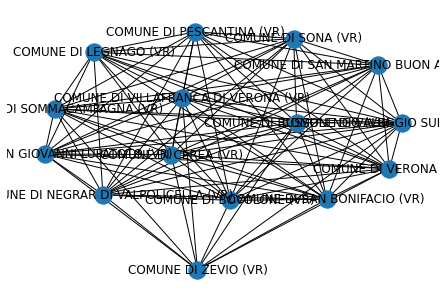

In [105]:
dom_graph = nx.Graph()

dom_graph.add_nodes_from(nodes)
dom_graph.add_edges_from(edges)
nx.draw_kamada_kawai(dom_graph, with_labels = True)

In [106]:
nx.number_of_edges(dom_graph)

101

In [107]:
betweenness = nx.betweenness_centrality(dom_graph)
betweenness

{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 0.0,
 'COMUNE DI BOVOLONE (VR)': 0.0043956043956043965,
 'COMUNE DI SONA (VR)': 0.0,
 'COMUNE DI PESCANTINA (VR)': 0.0,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 0.0043956043956043965,
 'COMUNE DI BUSSOLENGO (VR)': 0.0043956043956043965,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 0.0043956043956043965,
 'COMUNE DI LEGNAGO (VR)': 0.0,
 'COMUNE DI SOMMACAMPAGNA (VR)': 0.0043956043956043965,
 'COMUNE DI ZEVIO (VR)': 0.0,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 0.0043956043956043965,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 0.0043956043956043965,
 'COMUNE DI CEREA (VR)': 0.0043956043956043965,
 'COMUNE DI SAN BONIFACIO (VR)': 0.0043956043956043965,
 'COMUNE DI VERONA (VR)': 0.0043956043956043965}

In [108]:
a = max(betweenness.values())
b = min(betweenness.values())
print(betweenness.values())
[a, b]

dict_values([0.0, 0.0043956043956043965, 0.0, 0.0, 0.0043956043956043965, 0.0043956043956043965, 0.0043956043956043965, 0.0, 0.0043956043956043965, 0.0, 0.0043956043956043965, 0.0043956043956043965, 0.0043956043956043965, 0.0043956043956043965, 0.0043956043956043965])


[0.0043956043956043965, 0.0]

(-1.182972710738941,
 0.9255699558717119,
 -0.7970597639485454,
 0.8018630620382854)

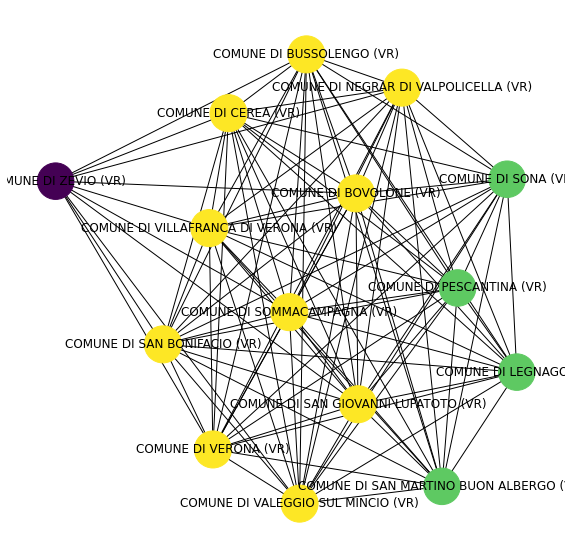

In [109]:
pos = nx.spring_layout(dom_graph)
betCent = nx.betweenness_centrality(dom_graph, normalized=True, endpoints=True)
node_color = [20000.0 * dom_graph.degree(v) for v in dom_graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(dom_graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [110]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['COMUNE DI BOVOLONE (VR)',
 'COMUNE DI VALEGGIO SUL MINCIO (VR)',
 'COMUNE DI BUSSOLENGO (VR)',
 'COMUNE DI VILLAFRANCA DI VERONA (VR)',
 'COMUNE DI SOMMACAMPAGNA (VR)']

In [111]:
degree_cen = nx.degree_centrality(dom_graph)
degree_cen

{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 0.9285714285714285,
 'COMUNE DI BOVOLONE (VR)': 1.0,
 'COMUNE DI SONA (VR)': 0.9285714285714285,
 'COMUNE DI PESCANTINA (VR)': 0.9285714285714285,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 1.0,
 'COMUNE DI BUSSOLENGO (VR)': 1.0,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 1.0,
 'COMUNE DI LEGNAGO (VR)': 0.9285714285714285,
 'COMUNE DI SOMMACAMPAGNA (VR)': 1.0,
 'COMUNE DI ZEVIO (VR)': 0.7142857142857142,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 1.0,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 1.0,
 'COMUNE DI CEREA (VR)': 1.0,
 'COMUNE DI SAN BONIFACIO (VR)': 1.0,
 'COMUNE DI VERONA (VR)': 1.0}

In [112]:
a = max(degree_cen.values())
b = min(degree_cen.values())
print(degree_cen.values())
[a, b]

dict_values([0.9285714285714285, 1.0, 0.9285714285714285, 0.9285714285714285, 1.0, 1.0, 1.0, 0.9285714285714285, 1.0, 0.7142857142857142, 1.0, 1.0, 1.0, 1.0, 1.0])


[1.0, 0.7142857142857142]

In [113]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(dom_graph)
print([community for community in communities])

[{'COMUNE DI BOVOLONE (VR)', 'COMUNE DI SONA (VR)', 'COMUNE DI PESCANTINA (VR)', 'COMUNE DI CEREA (VR)', 'COMUNE DI VALEGGIO SUL MINCIO (VR)', 'COMUNE DI VILLAFRANCA DI VERONA (VR)', 'COMUNE DI LEGNAGO (VR)', 'COMUNE DI SOMMACAMPAGNA (VR)', 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)', 'COMUNE DI ZEVIO (VR)', 'COMUNE DI BUSSOLENGO (VR)', 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)', 'COMUNE DI SAN MARTINO BUON ALBERGO (VR)', 'COMUNE DI SAN BONIFACIO (VR)', 'COMUNE DI VERONA (VR)'}]


In [114]:
print(nx.density(dom_graph))

0.9619047619047619


In [115]:
centrality = nx.eigenvector_centrality(dom_graph)
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[('COMUNE DI BOVOLONE (VR)', '0.27'),
 ('COMUNE DI BUSSOLENGO (VR)', '0.27'),
 ('COMUNE DI CEREA (VR)', '0.27'),
 ('COMUNE DI LEGNAGO (VR)', '0.25'),
 ('COMUNE DI NEGRAR DI VALPOLICELLA (VR)', '0.27'),
 ('COMUNE DI PESCANTINA (VR)', '0.25'),
 ('COMUNE DI SAN BONIFACIO (VR)', '0.27'),
 ('COMUNE DI SAN GIOVANNI LUPATOTO (VR)', '0.27'),
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)', '0.25'),
 ('COMUNE DI SOMMACAMPAGNA (VR)', '0.27'),
 ('COMUNE DI SONA (VR)', '0.25'),
 ('COMUNE DI VALEGGIO SUL MINCIO (VR)', '0.27'),
 ('COMUNE DI VERONA (VR)', '0.27'),
 ('COMUNE DI VILLAFRANCA DI VERONA (VR)', '0.27'),
 ('COMUNE DI ZEVIO (VR)', '0.20')]

In [116]:
closeness_centrality = []
for i in nodes:
    c_c = nx.closeness_centrality(dom_graph, i)
    closeness_centrality.append(c_c)
districts = [closeness_centrality, nodes]
districts

[[0.9333333333333333,
  1.0,
  0.9333333333333333,
  0.9333333333333333,
  1.0,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  0.7777777777777778,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 {'COMUNE DI BOVOLONE (VR)',
  'COMUNE DI BUSSOLENGO (VR)',
  'COMUNE DI CEREA (VR)',
  'COMUNE DI LEGNAGO (VR)',
  'COMUNE DI NEGRAR DI VALPOLICELLA (VR)',
  'COMUNE DI PESCANTINA (VR)',
  'COMUNE DI SAN BONIFACIO (VR)',
  'COMUNE DI SAN GIOVANNI LUPATOTO (VR)',
  'COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI SOMMACAMPAGNA (VR)',
  'COMUNE DI SONA (VR)',
  'COMUNE DI VALEGGIO SUL MINCIO (VR)',
  'COMUNE DI VERONA (VR)',
  'COMUNE DI VILLAFRANCA DI VERONA (VR)',
  'COMUNE DI ZEVIO (VR)'}]

In [117]:
cliques = list(nx.enumerate_all_cliques(dom_graph))
print(list(nx.find_cliques(dom_graph)))
print(nx.graph_number_of_cliques(dom_graph))
print(nx.node_clique_number(dom_graph))

[['COMUNE DI BOVOLONE (VR)', 'COMUNE DI CEREA (VR)', 'COMUNE DI VALEGGIO SUL MINCIO (VR)', 'COMUNE DI VILLAFRANCA DI VERONA (VR)', 'COMUNE DI SOMMACAMPAGNA (VR)', 'COMUNE DI BUSSOLENGO (VR)', 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)', 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)', 'COMUNE DI SAN BONIFACIO (VR)', 'COMUNE DI VERONA (VR)', 'COMUNE DI ZEVIO (VR)'], ['COMUNE DI BOVOLONE (VR)', 'COMUNE DI CEREA (VR)', 'COMUNE DI VALEGGIO SUL MINCIO (VR)', 'COMUNE DI VILLAFRANCA DI VERONA (VR)', 'COMUNE DI SOMMACAMPAGNA (VR)', 'COMUNE DI BUSSOLENGO (VR)', 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)', 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)', 'COMUNE DI SAN BONIFACIO (VR)', 'COMUNE DI VERONA (VR)', 'COMUNE DI SONA (VR)', 'COMUNE DI SAN MARTINO BUON ALBERGO (VR)', 'COMUNE DI PESCANTINA (VR)', 'COMUNE DI LEGNAGO (VR)']]
2
defaultdict(<class 'int'>, {'COMUNE DI BOVOLONE (VR)': 14, 'COMUNE DI CEREA (VR)': 14, 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 14, 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 14, 'COMUNE DI SOMMACAM

In [118]:
nx.betweenness_centrality_subset(dom_graph, targets=list(nodes), sources=list(nodes))

{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 0.0,
 'COMUNE DI BOVOLONE (VR)': 0.4,
 'COMUNE DI SONA (VR)': 0.0,
 'COMUNE DI PESCANTINA (VR)': 0.0,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 0.4,
 'COMUNE DI BUSSOLENGO (VR)': 0.4,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 0.4,
 'COMUNE DI LEGNAGO (VR)': 0.0,
 'COMUNE DI SOMMACAMPAGNA (VR)': 0.4,
 'COMUNE DI ZEVIO (VR)': 0.0,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 0.4,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 0.4,
 'COMUNE DI CEREA (VR)': 0.4,
 'COMUNE DI SAN BONIFACIO (VR)': 0.4,
 'COMUNE DI VERONA (VR)': 0.4}

In [119]:
nx.edge_betweenness_centrality(dom_graph)

{('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI VERONA (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI SAN GIOVANNI LUPATOTO (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI BUSSOLENGO (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI NEGRAR DI VALPOLICELLA (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI VILLAFRANCA DI VERONA (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI SOMMACAMPAGNA (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI SAN BONIFACIO (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI LEGNAGO (VR)'): 0.009523809523809525,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI CEREA (VR)'): 0.010476190476190477,
 ('COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
  'COMUNE DI PESCANTINA (VR)'): 0.00

In [120]:
nx.katz_centrality_numpy(dom_graph)

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 0.2515516462274709,
 'COMUNE DI BOVOLONE (VR)': 0.2675594782601281,
 'COMUNE DI SONA (VR)': 0.2515516462274709,
 'COMUNE DI PESCANTINA (VR)': 0.25155164622747095,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 0.26755947826012816,
 'COMUNE DI BUSSOLENGO (VR)': 0.2675594782601281,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 0.2675594782601281,
 'COMUNE DI LEGNAGO (VR)': 0.2515516462274709,
 'COMUNE DI SOMMACAMPAGNA (VR)': 0.2675594782601281,
 'COMUNE DI ZEVIO (VR)': 0.17608615235922967,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 0.2675594782601278,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 0.26755947826012794,
 'COMUNE DI CEREA (VR)': 0.26755947826012805,
 'COMUNE DI SAN BONIFACIO (VR)': 0.267559478260128,
 'COMUNE DI VERONA (VR)': 0.26755947826012794}

In [121]:
nx.triangles(dom_graph)

{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 78,
 'COMUNE DI BOVOLONE (VR)': 87,
 'COMUNE DI SONA (VR)': 78,
 'COMUNE DI PESCANTINA (VR)': 78,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 87,
 'COMUNE DI BUSSOLENGO (VR)': 87,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 87,
 'COMUNE DI LEGNAGO (VR)': 78,
 'COMUNE DI SOMMACAMPAGNA (VR)': 87,
 'COMUNE DI ZEVIO (VR)': 45,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 87,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 87,
 'COMUNE DI CEREA (VR)': 87,
 'COMUNE DI SAN BONIFACIO (VR)': 87,
 'COMUNE DI VERONA (VR)': 87}

In [122]:
nx.clustering(dom_graph)

{'COMUNE DI SAN MARTINO BUON ALBERGO (VR)': 1.0,
 'COMUNE DI BOVOLONE (VR)': 0.9560439560439561,
 'COMUNE DI SONA (VR)': 1.0,
 'COMUNE DI PESCANTINA (VR)': 1.0,
 'COMUNE DI VALEGGIO SUL MINCIO (VR)': 0.9560439560439561,
 'COMUNE DI BUSSOLENGO (VR)': 0.9560439560439561,
 'COMUNE DI VILLAFRANCA DI VERONA (VR)': 0.9560439560439561,
 'COMUNE DI LEGNAGO (VR)': 1.0,
 'COMUNE DI SOMMACAMPAGNA (VR)': 0.9560439560439561,
 'COMUNE DI ZEVIO (VR)': 1.0,
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)': 0.9560439560439561,
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)': 0.9560439560439561,
 'COMUNE DI CEREA (VR)': 0.9560439560439561,
 'COMUNE DI SAN BONIFACIO (VR)': 0.9560439560439561,
 'COMUNE DI VERONA (VR)': 0.9560439560439561}

In [123]:
list(nx.voterank(dom_graph))

['COMUNE DI BOVOLONE (VR)',
 'COMUNE DI VALEGGIO SUL MINCIO (VR)',
 'COMUNE DI BUSSOLENGO (VR)',
 'COMUNE DI VILLAFRANCA DI VERONA (VR)',
 'COMUNE DI SOMMACAMPAGNA (VR)',
 'COMUNE DI SAN GIOVANNI LUPATOTO (VR)',
 'COMUNE DI NEGRAR DI VALPOLICELLA (VR)',
 'COMUNE DI CEREA (VR)',
 'COMUNE DI SAN BONIFACIO (VR)',
 'COMUNE DI VERONA (VR)',
 'COMUNE DI SAN MARTINO BUON ALBERGO (VR)',
 'COMUNE DI SONA (VR)',
 'COMUNE DI PESCANTINA (VR)']

### Meno Popolosi

In [124]:
x = ['FERRARA DI MONTE BALDO', 'SAN MAURO DI SALINE', 'VELO VERONESE', 'ERBEZZO', 'SELVA DI PROGNO', 'CONCAMARISE', 'PALÙ', '''BOSCHI SANT'ANNA''',
 'BRENTINO BELLUNO', 'SAN ZENO DI MONTAGNA', 'CAZZANO DI TRAMIGNA', 'ROVEREDO DI GUÀ', 'BEVILACQUA', 'ERBÈ', 'BONAVIGO']
#new_data = dataset_1.where(dataset_1['Amministrazione Denominazione'] == ['COMUNE DI ', x, ' (VR)']).dropna(how='all',axis=0)

In [125]:
a=[]
for comune in x:
    df = dataset_1[dataset_1['Amministrazione Denominazione']=='COMUNE DI ' + comune + ' (VR)']
    a.append(df)
    data = pd.concat(a,ignore_index=True)

In [126]:
nodes = set(data['Amministrazione Denominazione'])
edges = []
for node in nodes:
  PD_current = [data["Partecipata Denominazione"][data['Amministrazione Denominazione']==node]][0]
  #for soc in PD_current:
  for i in range(len(data)):
    if data["Partecipata Denominazione"][i] in PD_current.values and data['Amministrazione Denominazione'][i] != node:
      edges = edges + [(data["Amministrazione Denominazione"][i], node)]

edges = set(edges)

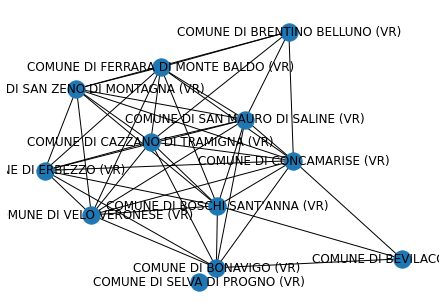

In [127]:
dom_graph = nx.Graph()

dom_graph.add_nodes_from(nodes)
dom_graph.add_edges_from(edges)
nx.draw_kamada_kawai(dom_graph, with_labels = True)

In [128]:
nx.number_of_edges(dom_graph)

42

In [129]:
betweenness = nx.betweenness_centrality(dom_graph)
betweenness

{'COMUNE DI CONCAMARISE (VR)': 0.08363636363636362,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 0.023030303030303033,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.023030303030303033,
 'COMUNE DI BRENTINO BELLUNO (VR)': 0.0,
 'COMUNE DI BONAVIGO (VR)': 0.02424242424242424,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 0.010909090909090908,
 'COMUNE DI ERBEZZO (VR)': 0.00606060606060606,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 0.04848484848484848,
 'COMUNE DI VELO VERONESE (VR)': 0.00606060606060606,
 'COMUNE DI SELVA DI PROGNO (VR)': 0.0,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 0.010909090909090908,
 'COMUNE DI BEVILACQUA (VR)': 0.0}

In [130]:
a = max(betweenness.values())
b = min(betweenness.values())
print(betweenness.values())
[a, b]

dict_values([0.08363636363636362, 0.023030303030303033, 0.023030303030303033, 0.0, 0.02424242424242424, 0.010909090909090908, 0.00606060606060606, 0.04848484848484848, 0.00606060606060606, 0.0, 0.010909090909090908, 0.0])


[0.08363636363636362, 0.0]

(-0.23148314267201525,
 1.0586420544129531,
 -0.22794036408918558,
 0.25210515139994594)

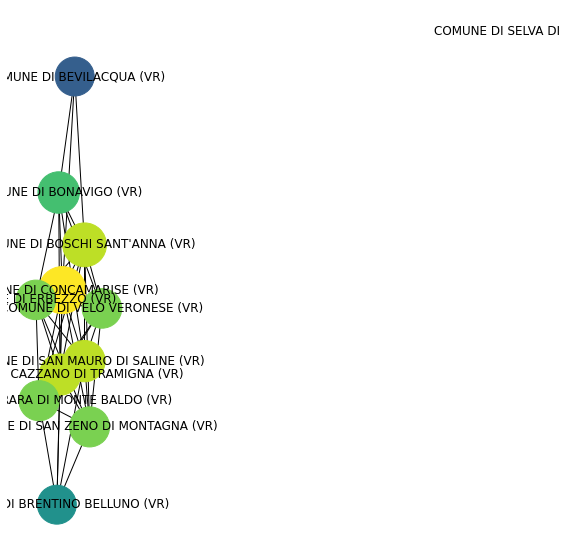

In [131]:
pos = nx.spring_layout(dom_graph)
betCent = nx.betweenness_centrality(dom_graph, normalized=True, endpoints=True)
node_color = [20000.0 * dom_graph.degree(v) for v in dom_graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(dom_graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [132]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['COMUNE DI CONCAMARISE (VR)',
 "COMUNE DI BOSCHI SANT'ANNA (VR)",
 'COMUNE DI BONAVIGO (VR)',
 'COMUNE DI SAN MAURO DI SALINE (VR)',
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)']

In [133]:
degree_cen = nx.degree_centrality(dom_graph)
degree_cen

{'COMUNE DI CONCAMARISE (VR)': 0.9090909090909092,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 0.8181818181818182,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.8181818181818182,
 'COMUNE DI BRENTINO BELLUNO (VR)': 0.4545454545454546,
 'COMUNE DI BONAVIGO (VR)': 0.6363636363636364,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 0.7272727272727273,
 'COMUNE DI ERBEZZO (VR)': 0.7272727272727273,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 0.8181818181818182,
 'COMUNE DI VELO VERONESE (VR)': 0.7272727272727273,
 'COMUNE DI SELVA DI PROGNO (VR)': 0.0,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 0.7272727272727273,
 'COMUNE DI BEVILACQUA (VR)': 0.2727272727272727}

In [134]:
a = max(degree_cen.values())
b = min(degree_cen.values())
print(degree_cen.values())
[a, b]

dict_values([0.9090909090909092, 0.8181818181818182, 0.8181818181818182, 0.4545454545454546, 0.6363636363636364, 0.7272727272727273, 0.7272727272727273, 0.8181818181818182, 0.7272727272727273, 0.0, 0.7272727272727273, 0.2727272727272727])


[0.9090909090909092, 0.0]

In [135]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(dom_graph)
print([community for community in communities])

[{'COMUNE DI CONCAMARISE (VR)', 'COMUNE DI SAN MAURO DI SALINE (VR)', 'COMUNE DI BONAVIGO (VR)', 'COMUNE DI CAZZANO DI TRAMIGNA (VR)', 'COMUNE DI FERRARA DI MONTE BALDO (VR)', 'COMUNE DI ERBEZZO (VR)', "COMUNE DI BOSCHI SANT'ANNA (VR)", 'COMUNE DI VELO VERONESE (VR)', 'COMUNE DI BRENTINO BELLUNO (VR)', 'COMUNE DI SAN ZENO DI MONTAGNA (VR)', 'COMUNE DI BEVILACQUA (VR)'}, {'COMUNE DI SELVA DI PROGNO (VR)'}]


In [136]:
print(nx.density(dom_graph))

0.6363636363636364


In [137]:
centrality = nx.eigenvector_centrality(dom_graph)
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[('COMUNE DI BEVILACQUA (VR)', '0.12'),
 ('COMUNE DI BONAVIGO (VR)', '0.26'),
 ("COMUNE DI BOSCHI SANT'ANNA (VR)", '0.33'),
 ('COMUNE DI BRENTINO BELLUNO (VR)', '0.21'),
 ('COMUNE DI CAZZANO DI TRAMIGNA (VR)', '0.34'),
 ('COMUNE DI CONCAMARISE (VR)', '0.36'),
 ('COMUNE DI ERBEZZO (VR)', '0.32'),
 ('COMUNE DI FERRARA DI MONTE BALDO (VR)', '0.31'),
 ('COMUNE DI SAN MAURO DI SALINE (VR)', '0.34'),
 ('COMUNE DI SAN ZENO DI MONTAGNA (VR)', '0.31'),
 ('COMUNE DI SELVA DI PROGNO (VR)', '0.00'),
 ('COMUNE DI VELO VERONESE (VR)', '0.32')]

In [138]:
closeness_centrality = []
for i in nodes:
    c_c = nx.closeness_centrality(dom_graph, i)
    closeness_centrality.append(c_c)
districts = [closeness_centrality, nodes]
districts

[[0.9090909090909091,
  0.8264462809917354,
  0.8264462809917354,
  0.606060606060606,
  0.6993006993006993,
  0.7575757575757576,
  0.7575757575757576,
  0.8264462809917354,
  0.7575757575757576,
  0.0,
  0.7575757575757576,
  0.5347593582887701],
 {'COMUNE DI BEVILACQUA (VR)',
  'COMUNE DI BONAVIGO (VR)',
  "COMUNE DI BOSCHI SANT'ANNA (VR)",
  'COMUNE DI BRENTINO BELLUNO (VR)',
  'COMUNE DI CAZZANO DI TRAMIGNA (VR)',
  'COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI ERBEZZO (VR)',
  'COMUNE DI FERRARA DI MONTE BALDO (VR)',
  'COMUNE DI SAN MAURO DI SALINE (VR)',
  'COMUNE DI SAN ZENO DI MONTAGNA (VR)',
  'COMUNE DI SELVA DI PROGNO (VR)',
  'COMUNE DI VELO VERONESE (VR)'}]

In [139]:
cliques = list(nx.enumerate_all_cliques(dom_graph))
print(list(nx.find_cliques(dom_graph)))
print(nx.graph_number_of_cliques(dom_graph))
print(nx.node_clique_number(dom_graph))

[['COMUNE DI CONCAMARISE (VR)', 'COMUNE DI SAN MAURO DI SALINE (VR)', 'COMUNE DI CAZZANO DI TRAMIGNA (VR)', 'COMUNE DI FERRARA DI MONTE BALDO (VR)', 'COMUNE DI SAN ZENO DI MONTAGNA (VR)', 'COMUNE DI BRENTINO BELLUNO (VR)'], ['COMUNE DI CONCAMARISE (VR)', 'COMUNE DI SAN MAURO DI SALINE (VR)', 'COMUNE DI CAZZANO DI TRAMIGNA (VR)', 'COMUNE DI FERRARA DI MONTE BALDO (VR)', 'COMUNE DI SAN ZENO DI MONTAGNA (VR)', "COMUNE DI BOSCHI SANT'ANNA (VR)", 'COMUNE DI VELO VERONESE (VR)', 'COMUNE DI ERBEZZO (VR)'], ['COMUNE DI CONCAMARISE (VR)', 'COMUNE DI SAN MAURO DI SALINE (VR)', 'COMUNE DI CAZZANO DI TRAMIGNA (VR)', 'COMUNE DI BONAVIGO (VR)', "COMUNE DI BOSCHI SANT'ANNA (VR)", 'COMUNE DI VELO VERONESE (VR)', 'COMUNE DI ERBEZZO (VR)'], ['COMUNE DI CONCAMARISE (VR)', 'COMUNE DI BEVILACQUA (VR)', "COMUNE DI BOSCHI SANT'ANNA (VR)", 'COMUNE DI BONAVIGO (VR)'], ['COMUNE DI SELVA DI PROGNO (VR)']]
5
defaultdict(<class 'int'>, {'COMUNE DI CONCAMARISE (VR)': 8, 'COMUNE DI SAN MAURO DI SALINE (VR)': 8, 'COM

In [140]:
nx.betweenness_centrality_subset(dom_graph, targets=list(nodes), sources=list(nodes))

{'COMUNE DI CONCAMARISE (VR)': 4.6,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 1.2666666666666668,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 1.2666666666666668,
 'COMUNE DI BRENTINO BELLUNO (VR)': 0.0,
 'COMUNE DI BONAVIGO (VR)': 1.3333333333333333,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 0.6,
 'COMUNE DI ERBEZZO (VR)': 0.3333333333333333,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 2.6666666666666665,
 'COMUNE DI VELO VERONESE (VR)': 0.3333333333333333,
 'COMUNE DI SELVA DI PROGNO (VR)': 0.0,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 0.6,
 'COMUNE DI BEVILACQUA (VR)': 0.0}

In [141]:
nx.edge_betweenness_centrality(dom_graph)

{('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI BEVILACQUA (VR)'): 0.06565656565656566,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI VELO VERONESE (VR)'): 0.023232323232323236,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI FERRARA DI MONTE BALDO (VR)'): 0.025252525252525252,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI SAN ZENO DI MONTAGNA (VR)'): 0.025252525252525252,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI BRENTINO BELLUNO (VR)'): 0.044444444444444446,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI ERBEZZO (VR)'): 0.023232323232323236,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI SAN MAURO DI SALINE (VR)'): 0.0202020202020202,
 ('COMUNE DI CONCAMARISE (VR)',
  "COMUNE DI BOSCHI SANT'ANNA (VR)"): 0.01818181818181818,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI CAZZANO DI TRAMIGNA (VR)'): 0.0202020202020202,
 ('COMUNE DI CONCAMARISE (VR)',
  'COMUNE DI BONAVIGO (VR)'): 0.025252525252525252,
 ('COMUNE DI SAN MAURO DI SALINE (VR)',
  'COMUNE DI FERRARA DI MONTE BALDO (VR)'): 0.0176767676

In [142]:
nx.katz_centrality_numpy(dom_graph)

{'COMUNE DI CONCAMARISE (VR)': 0.34969131834416733,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 0.33564656841172735,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.33564656841172735,
 'COMUNE DI BRENTINO BELLUNO (VR)': 0.2235682502396089,
 'COMUNE DI BONAVIGO (VR)': 0.2728502038819374,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 0.3108420044224603,
 'COMUNE DI ERBEZZO (VR)': 0.31532218202630835,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 0.32936693195874833,
 'COMUNE DI VELO VERONESE (VR)': 0.31532218202630835,
 'COMUNE DI SELVA DI PROGNO (VR)': 0.05930140383835466,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 0.3108420044224603,
 'COMUNE DI BEVILACQUA (VR)': 0.15449224925683994}

In [143]:
nx.triangles(dom_graph)

{'COMUNE DI CONCAMARISE (VR)': 32,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 30,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 30,
 'COMUNE DI BRENTINO BELLUNO (VR)': 10,
 'COMUNE DI BONAVIGO (VR)': 17,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 25,
 'COMUNE DI ERBEZZO (VR)': 26,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 28,
 'COMUNE DI VELO VERONESE (VR)': 26,
 'COMUNE DI SELVA DI PROGNO (VR)': 0,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 25,
 'COMUNE DI BEVILACQUA (VR)': 3}

In [144]:
nx.clustering(dom_graph)

{'COMUNE DI CONCAMARISE (VR)': 0.7111111111111111,
 'COMUNE DI SAN MAURO DI SALINE (VR)': 0.8333333333333334,
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)': 0.8333333333333334,
 'COMUNE DI BRENTINO BELLUNO (VR)': 1.0,
 'COMUNE DI BONAVIGO (VR)': 0.8095238095238095,
 'COMUNE DI FERRARA DI MONTE BALDO (VR)': 0.8928571428571429,
 'COMUNE DI ERBEZZO (VR)': 0.9285714285714286,
 "COMUNE DI BOSCHI SANT'ANNA (VR)": 0.7777777777777778,
 'COMUNE DI VELO VERONESE (VR)': 0.9285714285714286,
 'COMUNE DI SELVA DI PROGNO (VR)': 0,
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)': 0.8928571428571429,
 'COMUNE DI BEVILACQUA (VR)': 1.0}

In [145]:
list(nx.voterank(dom_graph))

['COMUNE DI CONCAMARISE (VR)',
 'COMUNE DI SAN MAURO DI SALINE (VR)',
 "COMUNE DI BOSCHI SANT'ANNA (VR)",
 'COMUNE DI CAZZANO DI TRAMIGNA (VR)',
 'COMUNE DI FERRARA DI MONTE BALDO (VR)',
 'COMUNE DI BONAVIGO (VR)',
 'COMUNE DI SAN ZENO DI MONTAGNA (VR)',
 'COMUNE DI ERBEZZO (VR)']

## Analisi sulle partecipate

In [146]:
dataset_1['Partecipata Denominazione'].sort_values()

508                2V ENERGY SRL
521            A4 HOLDING S.P.A.
74     ACQUE VERONESI S.C.A R.L.
548    ACQUE VERONESI S.C.A R.L.
495    ACQUE VERONESI S.C.A R.L.
                 ...            
348       VIVERACQUA S.C. A R.L.
103       VIVERACQUA S.C. A R.L.
352       VIVERACQUA S.C. A R.L.
232       VIVERACQUA S.C. A R.L.
434       VIVERACQUA S.C. A R.L.
Name: Partecipata Denominazione, Length: 578, dtype: object

In [155]:
dataset_1['Partecipata Denominazione'].value_counts()

CONSIGLIO DI BACINO 'VERONESE'                                                                                                                                         62
ACQUE VERONESI S.C.A R.L.                                                                                                                                              59
VIVERACQUA S.C. A R.L.                                                                                                                                                 52
CONSIGLIO DI BACINO VERONA NORD                                                                                                                                        48
CONSORZIO DI BACINO VERONA DUE DEL QUADRILATERO                                                                                                                        43
                                                                                                                                                      

In [148]:
newdata = dataset[['Partecipata Denominazione', 'Partecipata Codice Fiscale', 'Partecipata Forma Giuridica',
 'Partecipata Provincia Sede', 'Partecipata Comune Sede', 'Partecipata Settore Attività', 'Partecipata Divisione ATECO']]
newdata.sort_values(by='Partecipata Denominazione')

,Partecipata Denominazione,Partecipata Codice Fiscale,Partecipata Forma Giuridica,Partecipata Provincia Sede,Partecipata Comune Sede,Partecipata Settore Attività,Partecipata Divisione ATECO
508,2V ENERGY SRL,[03795470248],Società a responsabilità limitata,VERONA,Verona (VR),Settore Secondario,"FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ..."
521,A4 HOLDING S.P.A.,[00212330237],Società per azioni,VERONA,Verona (VR),Settore Terziario,ATTIVITA'DI DIREZIONE AZIENDALE E DI CONSULENZ...
74,ACQUE VERONESI S.C.A R.L.,[03567090232],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Secondario,GESTIONE DELLE RETI FOGNARIE
548,ACQUE VERONESI S.C.A R.L.,[03567090232],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Secondario,GESTIONE DELLE RETI FOGNARIE
495,ACQUE VERONESI S.C.A R.L.,[03567090232],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Secondario,GESTIONE DELLE RETI FOGNARIE
...,...,...,...,...,...,...,...
348,VIVERACQUA S.C. A R.L.,[04042120230],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Terziario,COMMERCIO ALL'INGROSSO (ESCLUSO QUELLO DI AUTO...
103,VIVERACQUA S.C. A R.L.,[04042120230],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Terziario,COMMERCIO ALL'INGROSSO (ESCLUSO QUELLO DI AUTO...
352,VIVERACQUA S.C. A R.L.,[04042120230],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Terziario,COMMERCIO ALL'INGROSSO (ESCLUSO QUELLO DI AUTO...
232,VIVERACQUA S.C. A R.L.,[04042120230],Società consortile a responsabilità limitata,VERONA,Verona (VR),Settore Terziario,COMMERCIO ALL'INGROSSO (ESCLUSO QUELLO DI AUTO...


In [149]:
newdata['Partecipata Provincia Sede'].value_counts()

VERONA           562
PADOVA             6
VARESE             5
BOLZANO            1
REGGIO EMILIA      1
TRENTO             1
Name: Partecipata Provincia Sede, dtype: int64

In [150]:
newdata['Partecipata Comune Sede'].value_counts()

Verona (VR)                      264
Villafranca di Verona (VR)        98
Nogara (VR)                       44
Peschiera del Garda (VR)          39
Bovolone (VR)                     33
Legnago (VR)                      25
Sommacampagna (VR)                16
San Bonifacio (VR)                13
Gallarate (VA)                     5
Padova (PD)                        4
Cavaion Veronese (VR)              4
San Giovanni Lupatoto (VR)         4
Bussolengo (VR)                    3
Tregnago (VR)                      3
San Zeno di Montagna (VR)          2
BRENZONE SUL GARDA (VR)            2
Monselice (PD)                     2
San Martino Buon Albergo (VR)      1
Trento (TN)                        1
Sona (VR)                          1
Bardolino (VR)                     1
Bolzano (BZ)                       1
Cerea (VR)                         1
Zevio (VR)                         1
Isola della Scala (VR)             1
Bosco Chiesanuova (VR)             1
San Pietro in Cariano (VR)         1
M

In [151]:
newdata['Partecipata Forma Giuridica'].value_counts()

Ente pubblico                                   156
Società consortile a responsabilità limitata    136
Società per azioni                              104
Società a responsabilità limitata                83
Consorzio                                        75
Fondazione                                       12
Società cooperativa                               4
Società estera                                    2
Azienda speciale                                  2
Associazione                                      2
Istituzione                                       1
Società consortile per azioni                     1
Name: Partecipata Forma Giuridica, dtype: int64

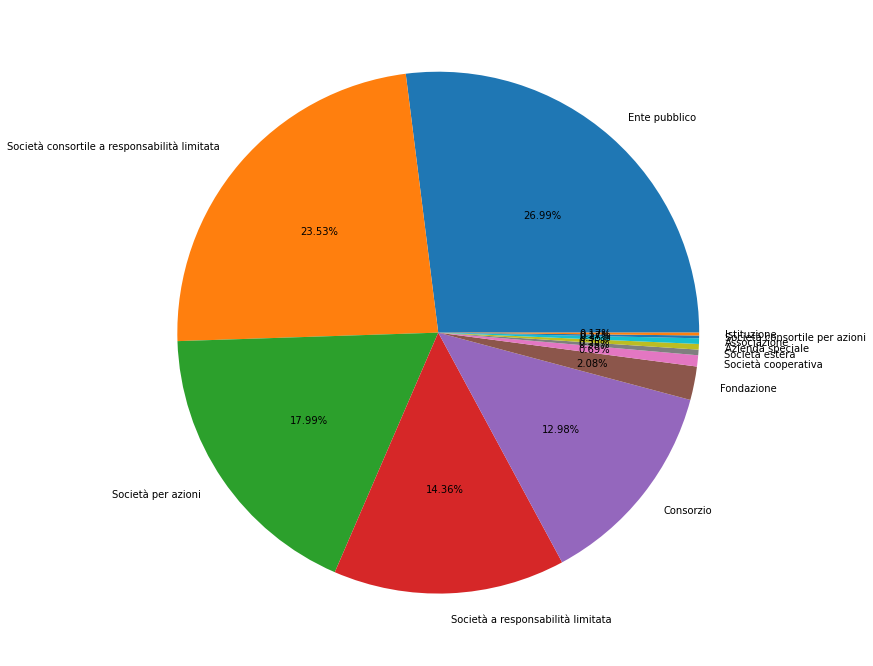

In [152]:
Forma_Giuridica = list(newdata['Partecipata Forma Giuridica'])
EP = Forma_Giuridica.count('Ente pubblico')
SCRL = Forma_Giuridica.count('Società consortile a responsabilità limitata')
SPA = Forma_Giuridica.count('Società per azioni')
SRL = Forma_Giuridica.count('Società a responsabilità limitata')
CON = Forma_Giuridica.count('Consorzio')
FON = Forma_Giuridica.count('Fondazione')
SC = Forma_Giuridica.count('Società cooperativa')
SE = Forma_Giuridica.count('Società estera')
AZS = Forma_Giuridica.count('Azienda speciale')
ASS = Forma_Giuridica.count('Associazione')
SCA = Forma_Giuridica.count('Società consortile per azioni')
IST = Forma_Giuridica.count('Istituzione')

Forma_Giuridica = ['Ente pubblico', 'Società consortile a responsabilità limitata', 'Società per azioni', 'Società a responsabilità limitata',
'Consorzio', 'Fondazione', 'Società cooperativa', 'Società estera', 'Azienda speciale', 'Associazione', 'Società consortile per azioni', 'Istituzione']
count = [EP, SCRL, SPA, SRL, CON, FON, SC, SE, AZS, ASS, SCA, IST]
plt.figure(figsize=(14,12))
plt.pie(count, labels=Forma_Giuridica, autopct='%.2f%%')
plt.show()

In [153]:
newdata['Partecipata Settore Attività'].value_counts()

Settore Secondario    388
Settore Terziario     189
Settore Primario        1
Name: Partecipata Settore Attività, dtype: int64

In [154]:
newdata['Partecipata Divisione ATECO'].value_counts()

ATTIVITA'DI RACCOLTA, TRATTAMENTO E SMALTIMENTO DEI RIFIUTI; RECUPERO DEI MATERIALI        138
GESTIONE DELLE RETI FOGNARIE                                                                98
RACCOLTA, TRATTAMENTO E FORNITURA DI ACQUA                                                  88
FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ARIA CONDIZIONATA                             56
COMMERCIO ALL'INGROSSO (ESCLUSO QUELLO DI AUTOVEICOLI E DI MOTOCICLI)                       52
ALLOGGIO                                                                                    25
AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIONE SOCIALE OBBLIGATORIA                       20
ALTRE ATTIVITA'PROFESSIONALI, SCIENTIFICHE E TECNICHE                                       20
ATTIVITA'DI SERVIZI FINANZIARI (ESCLUSE LE ASSICURAZIONI E I FONDI PENSIONE)                12
ATTIVITA'DI SUPPORTO PER LE FUNZIONI D'UFFICIO E ALTRI SERVIZI DI SUPPORTO ALLE IMPRESE     10
ATTIVITA'DI DIREZIONE AZIENDALE E DI CONSULENZA GE